In [47]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
# import API key
from config import weather_api_key

In [3]:
# starting URL for Weather Map API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=77532dee00854e0fc96fbc64e9105900


In [4]:
#create set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add latitudes and longitudes to a list 
coordinates = list(lat_lngs)

In [6]:
# Use the Citipy module to determine city based on lat and long 
from citipy import citipy

In [7]:
# use tuple fxn to display lat and long combos
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)
          

luis correia br
jamestown sh
eyl so
beringovskiy ru
taolanaro mg
barentsburg sj
waitati nz
albany au
puerto escondido mx
butaritari ki
inta ru
kodiak us
chagda ru
lebu cl
burnie au
kununurra au
mataura pf
mar del plata ar
punta arenas cl
rikitea pf
tigil ru
ushuaia ar
puerto ayora ec
nome us
busselton au
ushuaia ar
nanortalik gl
kaduqli sd
taseyevo ru
bocaranga cf
gerede tr
tiksi ru
bandhi pk
qaanaaq gl
klaksvik fo
puerto ayora ec
iqaluit ca
mataura pf
rikitea pf
thompson ca
dukat ru
barentsburg sj
castro cl
itarema br
bethel us
buin pg
atuona pf
requena pe
coquimbo cl
cape town za
sao joao da barra br
sorland no
aitape pg
esperance au
busselton au
lompoc us
college us
qaanaaq gl
lasa cn
porto novo cv
beloha mg
kavieng pg
butaritari ki
atuona pf
weiser us
ponta do sol cv
puerto ayora ec
nizhneyansk ru
kudahuvadhoo mv
morrisburg ca
east london za
puerto ayora ec
hermanus za
lazaro cardenas mx
saint anthony ca
khatanga ru
kavaratti in
thompson ca
bengkulu id
nikolskoye ru
barrow us
palab

saint-pierre pm
kapaa us
coihaique cl
mataura pf
port hardy ca
ushuaia ar
kaeo nz
marawi sd
tromso no
qaanaaq gl
norman wells ca
mahebourg mu
port elizabeth za
mugur-aksy ru
taolanaro mg
puerto ayora ec
cape town za
bethel us
georgetown sh
new norfolk au
punta arenas cl
cherskiy ru
busselton au
bluff nz
jieshou cn
garango bf
punta arenas cl
yellowknife ca
karabulak kz
vestmannaeyjar is
bluff nz
mporokoso zm
belushya guba ru
black river jm
holland us
hasaki jp
grand gaube mu
atuona pf
tsentralnyy ru
qaanaaq gl
busselton au
thompson ca
kavieng pg
honiara sb
sobolevo ru
oxbow ca
rikitea pf
mwene-ditu cd
dickinson us
ushuaia ar
kaitangata nz
ngukurr au
tabory ru
hamilton bm
hobart au
mehamn no
chifeng cn
casper us
ushuaia ar
vaitupu wf
dzhusaly kz
mataura pf
bonthe sl
provideniya ru
kushiro jp
seoul kr
bluff nz
attawapiskat ca
tawkar sd
illoqqortoormiut gl
port alfred za
caiaponia br
cape town za
nueva loja ec
tamandare br
okato nz
sibolga id
sicamous ca
hilo us
thompson ca
airai pw
pacifi

punta arenas cl
bababe mr
tiksi ru
jamestown sh
asau tv
rikitea pf
port elizabeth za
smithers ca
saleaula ws
touros br
taolanaro mg
vaitupu wf
ribeira grande pt
jamestown sh
carnarvon au
punta arenas cl
port alfred za
sujangarh in
wawa ca
nizhneyansk ru
kichera ru
khatanga ru
saint-philippe re
hobart au
bluff nz
monte cristi do
saskylakh ru
attawapiskat ca
warqla dz
iqaluit ca


In [8]:
# create a list for holding the cities
cities = []
# identify nearest city for each lat and long combo 
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #if the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
#print the city to confirm sufficient count
len(cities)
    
    

633

In [14]:
import time
from datetime import datetime

In [15]:
# create empty list to hold weather data
city_data = []
# print the beginning of the logging
print("Beginning Data Retrieval     ")
print("------------------------")

# create counters
record_count = 1
set_count = 1

Beginning Data Retrieval     
------------------------


In [65]:
# List of city data
city_data = []
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters
record_count = 1
set_count = 1
# Loop through all the cities in our list
for i, city in enumerate(cities):
   # Group cities in sets of 50 for logging purposes
   if (i % 50 == 0 and i >= 50):
       set_count += 1
       record_count = 1
   # Create endpoint URL with each city
   city_url = url + "&q=" + city.replace(" ", "+")
   # Log the url, record, and set numbers
   print(f"Processing Record {record_count} of Set {set_count} | {city}")
   # Add 1 to the record count
   record_count += 1
   # Run an API request for each of the cities
   try:
       # Parse the JSON and retrieve data
       city_weather = requests.get(city_url).json()
       # Parse out the max temp, humidity, and cloudiness
       city_lat = city_weather["coord"]["lat"]
       city_lng = city_weather["coord"]["lon"]
       city_max_temp = city_weather["main"]["temp_max"]
       city_humidity = city_weather["main"]["humidity"]
       city_clouds = city_weather["clouds"]["all"]
       city_wind = city_weather["wind"]["speed"]
       city_country = city_weather["sys"]["country"]
       city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
       # Append the City information into city_data list
       city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
   # If an error is experienced, skip the city
   except:
       print("City not found. Skipping...")
       pass
# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | luis correia
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | eyl
Processing Record 4 of Set 1 | beringovskiy
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 7 of Set 1 | waitati
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | puerto escondido
Processing Record 10 of Set 1 | butaritari
Processing Record 11 of Set 1 | inta
Processing Record 12 of Set 1 | kodiak
Processing Record 13 of Set 1 | chagda
City not found. Skipping...
Processing Record 14 of Set 1 | lebu
Processing Record 15 of Set 1 | burnie
Processing Record 16 of Set 1 | kununurra
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | mar del plata
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | tigi

Processing Record 36 of Set 4 | christchurch
Processing Record 37 of Set 4 | that phanom
Processing Record 38 of Set 4 | hithadhoo
Processing Record 39 of Set 4 | bilma
Processing Record 40 of Set 4 | ostersund
Processing Record 41 of Set 4 | camopi
Processing Record 42 of Set 4 | ramshir
Processing Record 43 of Set 4 | margate
Processing Record 44 of Set 4 | warqla
City not found. Skipping...
Processing Record 45 of Set 4 | naila
Processing Record 46 of Set 4 | amahai
Processing Record 47 of Set 4 | marevo
Processing Record 48 of Set 4 | inderborskiy
City not found. Skipping...
Processing Record 49 of Set 4 | mareeba
Processing Record 50 of Set 4 | garowe
Processing Record 1 of Set 5 | lunca
Processing Record 2 of Set 5 | beaufort
Processing Record 3 of Set 5 | morondava
Processing Record 4 of Set 5 | chuy
Processing Record 5 of Set 5 | waddan
Processing Record 6 of Set 5 | mlonggo
Processing Record 7 of Set 5 | baruun-urt
Processing Record 8 of Set 5 | lufilufi
Processing Record 9 of

Processing Record 21 of Set 8 | ngukurr
City not found. Skipping...
Processing Record 22 of Set 8 | tabory
Processing Record 23 of Set 8 | hamilton
Processing Record 24 of Set 8 | chifeng
Processing Record 25 of Set 8 | casper
Processing Record 26 of Set 8 | dzhusaly
City not found. Skipping...
Processing Record 27 of Set 8 | bonthe
Processing Record 28 of Set 8 | kushiro
Processing Record 29 of Set 8 | seoul
Processing Record 30 of Set 8 | tawkar
City not found. Skipping...
Processing Record 31 of Set 8 | caiaponia
Processing Record 32 of Set 8 | nueva loja
Processing Record 33 of Set 8 | tamandare
Processing Record 34 of Set 8 | okato
Processing Record 35 of Set 8 | sibolga
Processing Record 36 of Set 8 | sicamous
Processing Record 37 of Set 8 | pacific grove
Processing Record 38 of Set 8 | zelenogorskiy
Processing Record 39 of Set 8 | noumea
Processing Record 40 of Set 8 | road town
Processing Record 41 of Set 8 | diego de almagro
Processing Record 42 of Set 8 | aakirkeby
City not f

City not found. Skipping...
Processing Record 11 of Set 12 | altay
Processing Record 12 of Set 12 | kalemie
Processing Record 13 of Set 12 | meulaboh
Processing Record 14 of Set 12 | urmary
Processing Record 15 of Set 12 | grants
Processing Record 16 of Set 12 | fairbanks
Processing Record 17 of Set 12 | annau
Processing Record 18 of Set 12 | vitoria
Processing Record 19 of Set 12 | mananjary
Processing Record 20 of Set 12 | tanout
Processing Record 21 of Set 12 | vzmorye
Processing Record 22 of Set 12 | muroto
Processing Record 23 of Set 12 | valdemarpils
Processing Record 24 of Set 12 | auki
Processing Record 25 of Set 12 | mayumba
Processing Record 26 of Set 12 | kongolo
Processing Record 27 of Set 12 | mutsu
Processing Record 28 of Set 12 | saint-francois
Processing Record 29 of Set 12 | maarianhamina
Processing Record 30 of Set 12 | pangody
Processing Record 31 of Set 12 | ayan
Processing Record 32 of Set 12 | ishimbay
Processing Record 33 of Set 12 | pozo colorado
Processing Reco

In [80]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Luis Correia,-2.8792,-41.6669,87.80,70,20,14.97,BR,2021-11-26 19:11:56
1,Jamestown,42.0970,-79.2353,31.59,86,90,20.71,US,2021-11-26 19:11:56
2,Eyl,7.9803,49.8164,79.43,79,99,12.80,SO,2021-11-26 19:11:57
3,Beringovskiy,63.0500,179.3167,-3.59,98,64,12.10,RU,2021-11-26 19:11:57
4,Waitati,-45.7500,170.5667,44.10,95,100,5.21,NZ,2021-11-26 19:11:58
...,...,...,...,...,...,...,...,...,...
569,Alakurtti,66.9672,30.3491,2.16,94,54,4.65,RU,2021-11-26 19:11:30
570,Smithers,54.7804,-127.1743,32.32,69,75,3.44,CA,2021-11-26 19:11:30
571,Sujangarh,27.7011,74.4649,66.51,29,0,7.74,IN,2021-11-26 19:11:31
572,Wawa,9.9022,4.4192,84.27,24,39,2.08,NG,2021-11-26 19:11:31


In [81]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df



,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Luis Correia,BR,2021-11-26 19:11:56,-2.8792,-41.6669,87.80,70,20,14.97
1,Jamestown,US,2021-11-26 19:11:56,42.0970,-79.2353,31.59,86,90,20.71
2,Eyl,SO,2021-11-26 19:11:57,7.9803,49.8164,79.43,79,99,12.80
3,Beringovskiy,RU,2021-11-26 19:11:57,63.0500,179.3167,-3.59,98,64,12.10
4,Waitati,NZ,2021-11-26 19:11:58,-45.7500,170.5667,44.10,95,100,5.21
...,...,...,...,...,...,...,...,...,...
569,Alakurtti,RU,2021-11-26 19:11:30,66.9672,30.3491,2.16,94,54,4.65
570,Smithers,CA,2021-11-26 19:11:30,54.7804,-127.1743,32.32,69,75,3.44
571,Sujangarh,IN,2021-11-26 19:11:31,27.7011,74.4649,66.51,29,0,7.74
572,Wawa,NG,2021-11-26 19:11:31,9.9022,4.4192,84.27,24,39,2.08


In [82]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [83]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


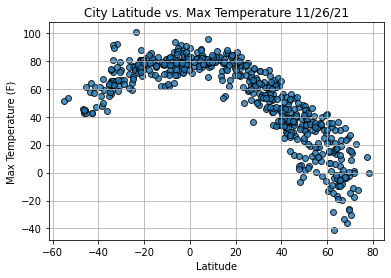

In [84]:
# Import the time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


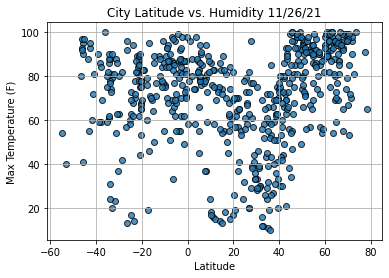

In [85]:
# Import the time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

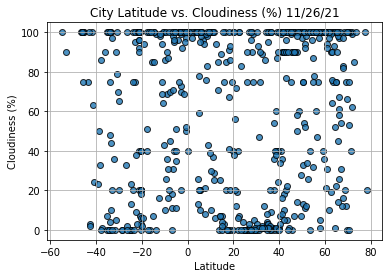

In [86]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


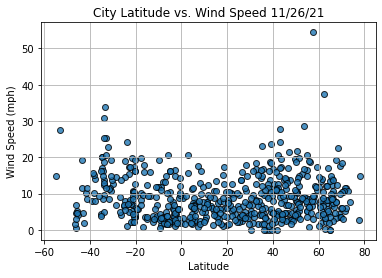

In [87]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [88]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [89]:
index13 = city_data_df.loc[13]
index13

City                      Mataura
Country                        NZ
Date          2021-11-26 19:07:10
Lat                      -46.1927
Lng                      168.8643
Max Temp                    42.87
Humidity                       97
Cloudiness                    100
Wind Speed                   0.47
Name: 13, dtype: object

In [90]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3       True
4      False
       ...  
569     True
570     True
571     True
572     True
573     True
Name: Lat, Length: 574, dtype: bool

In [94]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


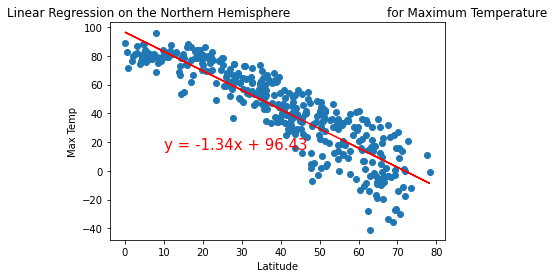

In [117]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,15))


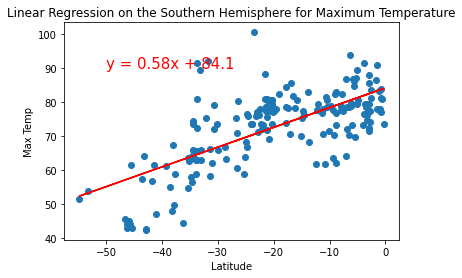

In [98]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       "Linear Regression on the Southern Hemisphere for Maximum Temperature", "Max Temp",(-50,90))

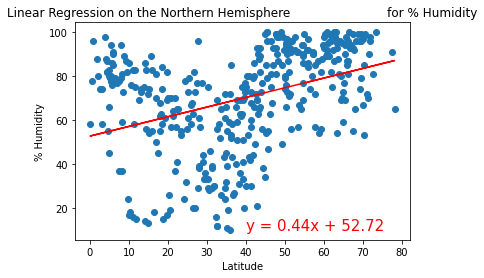

In [101]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))


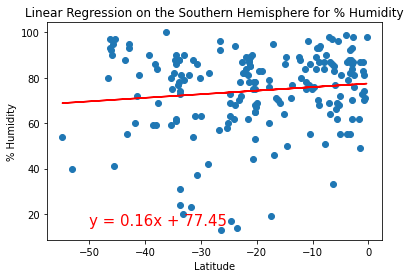

In [104]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))


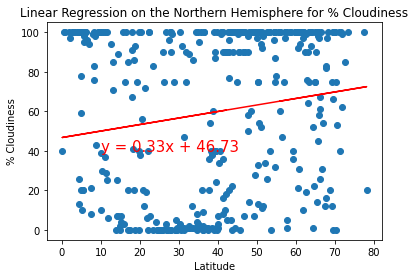

In [116]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(10,40))


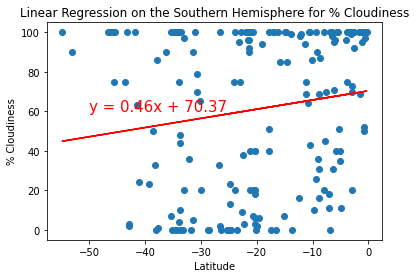

In [111]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))


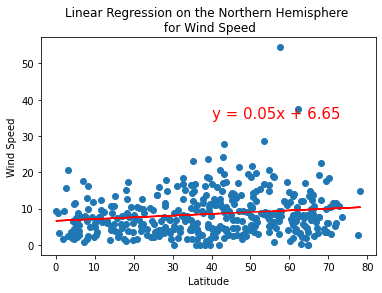

In [119]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))


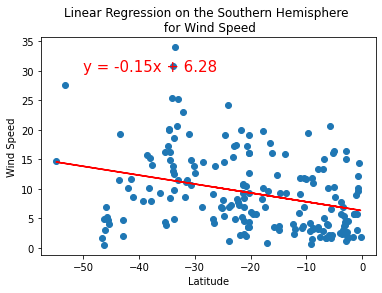

In [123]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,30))


In [130]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests
# Import the API key.
from config import g_key

ImportError: cannot import name 'g_key' from 'config' (/Users/christinabay/github/World_Weather_Analysis/config.py)